In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# READING DATAS
df=pd.read_csv(r"C:\Users\vijay\Downloads\Ixigo_Dataset\train.csv")
test=pd.read_csv(r"C:\Users\vijay\Downloads\Ixigo_Dataset\test.csv")

In [3]:
df

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,ArrivalDelay,DepartureDelay
0,2020-01-01,FZR,12138,2657812,NaN,2020-01-01 21:40:00,2020-01-01 00:00:00,2020-01-01 21:40:00,0,0,0,0
1,2020-01-01,FDK,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0,11,11
2,2020-01-01,KKP,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0,14,13
3,2020-01-01,GJUT,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0,18,17
4,2020-01-01,GNA,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0,20,19
...,...,...,...,...,...,...,...,...,...,...,...,...
31870,2020-02-19,PGW,12925,2658284,2020-02-20 17:19:00,2020-02-20 17:21:00,2020-02-20 18:39:00,2020-02-20 18:41:00,1723,1,80,80
31871,2020-02-19,JRC,12925,2657701,2020-02-20 17:37:00,2020-02-20 17:39:00,2020-02-20 19:04:00,2020-02-20 19:06:00,1739,1,87,87
31872,2020-02-19,JUC,12925,2657676,2020-02-20 17:53:00,2020-02-20 17:58:00,2020-02-20 19:15:00,2020-02-20 19:30:00,1744,1,82,92
31873,2020-02-19,BEAS,12925,2658299,2020-02-20 18:30:00,2020-02-20 18:32:00,2020-02-20 19:58:00,2020-02-20 20:00:00,1780,1,88,88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31875 entries, 0 to 31874
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runDate             31875 non-null  object
 1   stations            31875 non-null  object
 2   trainCode           31875 non-null  int64 
 3   trainStationId      31875 non-null  int64 
 4   scheduledArrival    31184 non-null  object
 5   scheduledDeparture  31097 non-null  object
 6   actualArrival       31875 non-null  object
 7   actualDeparture     31775 non-null  object
 8   distance            31875 non-null  int64 
 9   dayCount            31875 non-null  int64 
 10  ArrivalDelay        31875 non-null  int64 
 11  DepartureDelay      31875 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.9+ MB


In [5]:
test

,runDate,stations,trainId,trainCode,index,trainStationId,scheduledArrival,scheduledDeparture,distance,dayCount,day
0,2020-02-20,FZR,11528,12138,1,2657812,NaN,2020-02-20 21:40:00,0,0,Thursday
1,2020-02-20,FDK,11528,12138,2,2659393,2020-02-20 22:05:00,2020-02-20 22:07:00,32,0,Thursday
2,2020-02-20,KKP,11528,12138,3,2658108,2020-02-20 22:23:00,2020-02-20 22:25:00,45,0,Thursday
3,2020-02-20,GJUT,11528,12138,4,2734206,2020-02-20 22:38:00,2020-02-20 22:40:00,61,0,Thursday
4,2020-02-20,GNA,11528,12138,5,2742572,2020-02-20 22:54:00,2020-02-20 22:56:00,76,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
690,2020-02-20,PGW,12117,12925,40,2658284,2020-02-21 17:19:00,2020-02-21 17:21:00,1723,1,Thursday
691,2020-02-20,JRC,12117,12925,41,2657701,2020-02-21 17:37:00,2020-02-21 17:39:00,1739,1,Thursday
692,2020-02-20,JUC,12117,12925,42,2657676,2020-02-21 17:53:00,2020-02-21 17:58:00,1744,1,Thursday
693,2020-02-20,BEAS,12117,12925,43,2658299,2020-02-21 18:30:00,2020-02-21 18:32:00,1780,1,Thursday


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runDate             695 non-null    object
 1   stations            695 non-null    object
 2   trainId             695 non-null    int64 
 3   trainCode           695 non-null    int64 
 4   index               695 non-null    int64 
 5   trainStationId      695 non-null    int64 
 6   scheduledArrival    680 non-null    object
 7   scheduledDeparture  678 non-null    object
 8   distance            695 non-null    int64 
 9   dayCount            695 non-null    int64 
 10  day                 695 non-null    object
dtypes: int64(6), object(5)
memory usage: 59.9+ KB


In [7]:
# Number of of null values in each column 
count=round(df.isnull().sum(),2)
percent=round((df.isnull().sum()/df.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

,index,Missing Values Count,Missing Values %
4,scheduledArrival,691,2.17
5,scheduledDeparture,778,2.44
7,actualDeparture,100,0.31


In [8]:
# Number of of null values in each column 
count=round(test.isnull().sum(),2)
percent=round((test.isnull().sum()/test.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

,index,Missing Values Count,Missing Values %
6,scheduledArrival,15,2.16
7,scheduledDeparture,17,2.45


In [9]:
#Handling missing rows of train dataset
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 1 to 31873
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runDate             30406 non-null  object
 1   stations            30406 non-null  object
 2   trainCode           30406 non-null  int64 
 3   trainStationId      30406 non-null  int64 
 4   scheduledArrival    30406 non-null  object
 5   scheduledDeparture  30406 non-null  object
 6   actualArrival       30406 non-null  object
 7   actualDeparture     30406 non-null  object
 8   distance            30406 non-null  int64 
 9   dayCount            30406 non-null  int64 
 10  ArrivalDelay        30406 non-null  int64 
 11  DepartureDelay      30406 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [10]:
#Handling missing rows of test dataset
test = test.dropna(axis=0)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 1 to 693
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runDate             663 non-null    object
 1   stations            663 non-null    object
 2   trainId             663 non-null    int64 
 3   trainCode           663 non-null    int64 
 4   index               663 non-null    int64 
 5   trainStationId      663 non-null    int64 
 6   scheduledArrival    663 non-null    object
 7   scheduledDeparture  663 non-null    object
 8   distance            663 non-null    int64 
 9   dayCount            663 non-null    int64 
 10  day                 663 non-null    object
dtypes: int64(6), object(5)
memory usage: 62.2+ KB


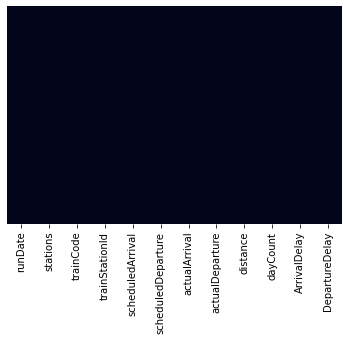

In [11]:
#Visualising missing values in training datasets 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

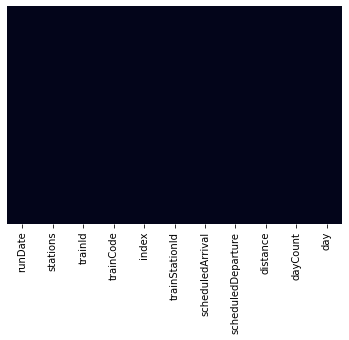

In [12]:
#Visualising missing values in test dataset
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [13]:
df_new = df.drop(["ArrivalDelay",'DepartureDelay'],axis=1)
df_new

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount
1,2020-01-01,FDK,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0
2,2020-01-01,KKP,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0
3,2020-01-01,GJUT,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0
4,2020-01-01,GNA,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0
5,2020-01-01,BTI,12138,2657716,2020-01-01 23:25:00,2020-01-01 23:50:00,2020-01-01 23:31:00,2020-01-01 23:51:00,88,0
...,...,...,...,...,...,...,...,...,...,...
31869,2020-02-19,LDH,12925,2658435,2020-02-20 16:46:00,2020-02-20 16:51:00,2020-02-20 17:55:00,2020-02-20 18:04:00,1687,1
31870,2020-02-19,PGW,12925,2658284,2020-02-20 17:19:00,2020-02-20 17:21:00,2020-02-20 18:39:00,2020-02-20 18:41:00,1723,1
31871,2020-02-19,JRC,12925,2657701,2020-02-20 17:37:00,2020-02-20 17:39:00,2020-02-20 19:04:00,2020-02-20 19:06:00,1739,1
31872,2020-02-19,JUC,12925,2657676,2020-02-20 17:53:00,2020-02-20 17:58:00,2020-02-20 19:15:00,2020-02-20 19:30:00,1744,1


In [15]:
#seperating date and time columns
df_new['scheduledArrival_date'] = pd.to_datetime(df_new['scheduledArrival']).dt.date
df_new['scheduledArrival_time'] = pd.to_datetime(df_new['scheduledArrival']).dt.time
df_new['scheduledDeparture_date'] = pd.to_datetime(df_new['scheduledDeparture']).dt.date
df_new['scheduledDeparture_time'] = pd.to_datetime(df_new['scheduledDeparture']).dt.time
df_new['actualArrival_date'] = pd.to_datetime(df_new['actualArrival']).dt.date
df_new['actualArrival_time'] = pd.to_datetime(df_new['actualArrival']).dt.time
df_new['actualDeparture_date'] = pd.to_datetime(df_new['actualDeparture']).dt.date
df_new['actualDeparture_time'] = pd.to_datetime(df_new['actualDeparture']).dt.time
df_new


,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,scheduledArrival_date,scheduledArrival_time,scheduledDeparture_date,scheduledDeparture_time,actualArrival_date,actualArrival_time,actualDeparture_date,actualDeparture_time
1,2020-01-01,FDK,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0,2020-01-01,22:05:00,2020-01-01,22:07:00,2020-01-01,22:16:00,2020-01-01,22:18:00
2,2020-01-01,KKP,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0,2020-01-01,22:23:00,2020-01-01,22:25:00,2020-01-01,22:37:00,2020-01-01,22:38:00
3,2020-01-01,GJUT,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0,2020-01-01,22:38:00,2020-01-01,22:40:00,2020-01-01,22:56:00,2020-01-01,22:57:00
4,2020-01-01,GNA,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0,2020-01-01,22:54:00,2020-01-01,22:56:00,2020-01-01,23:14:00,2020-01-01,23:15:00
5,2020-01-01,BTI,12138,2657716,2020-01-01 23:25:00,2020-01-01 23:50:00,2020-01-01 23:31:00,2020-01-01 23:51:00,88,0,2020-01-01,23:25:00,2020-01-01,23:50:00,2020-01-01,23:31:00,2020-01-01,23:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,2020-02-19,LDH,12925,2658435,2020-02-20 16:46:00,2020-02-20 16:51:00,2020-02-20 17:55:00,2020-02-20 18:04:00,1687,1,2020-02-20,16:46:00,2020-02-20,16:51:00,2020-02-20,17:55:00,2020-02-20,18:04:00
31870,2020-02-19,PGW,12925,2658284,2020-02-20 17:19:00,2020-02-20 17:21:00,2020-02-20 18:39:00,2020-02-20 18:41:00,1723,1,2020-02-20,17:19:00,2020-02-20,17:21:00,2020-02-20,18:39:00,2020-02-20,18:41:00
31871,2020-02-19,JRC,12925,2657701,2020-02-20 17:37:00,2020-02-20 17:39:00,2020-02-20 19:04:00,2020-02-20 19:06:00,1739,1,2020-02-20,17:37:00,2020-02-20,17:39:00,2020-02-20,19:04:00,2020-02-20,19:06:00
31872,2020-02-19,JUC,12925,2657676,2020-02-20 17:53:00,2020-02-20 17:58:00,2020-02-20 19:15:00,2020-02-20 19:30:00,1744,1,2020-02-20,17:53:00,2020-02-20,17:58:00,2020-02-20,19:15:00,2020-02-20,19:30:00


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 1 to 31873
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   runDate                  30406 non-null  object
 1   stations                 30406 non-null  object
 2   trainCode                30406 non-null  int64 
 3   trainStationId           30406 non-null  int64 
 4   scheduledArrival         30406 non-null  object
 5   scheduledDeparture       30406 non-null  object
 6   actualArrival            30406 non-null  object
 7   actualDeparture          30406 non-null  object
 8   distance                 30406 non-null  int64 
 9   dayCount                 30406 non-null  int64 
 10  scheduledArrival_date    30406 non-null  object
 11  scheduledArrival_time    30406 non-null  object
 12  scheduledDeparture_date  30406 non-null  object
 13  scheduledDeparture_time  30406 non-null  object
 14  actualArrival_date       30406 non-nul

In [17]:
# converting dates and times in integer of train dataset
dates = ["runDate","scheduledArrival_date","scheduledDeparture_date","actualArrival_date","actualDeparture_date"]
for i in dates:
    df_new[i] = df_new[i].apply(str).str.replace('-', '')
for i in dates:
    df_new[i] = df_new[i].astype("int")

times = ["scheduledArrival_time","scheduledDeparture_time","actualArrival_time","actualDeparture_time"]
for i in times:
    df_new[i]= df_new[i].apply(str).str.replace(':', '')
for i in times:
    df_new[i] = df_new[i].astype("int")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 1 to 31873
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   runDate                  30406 non-null  int32 
 1   stations                 30406 non-null  object
 2   trainCode                30406 non-null  int64 
 3   trainStationId           30406 non-null  int64 
 4   scheduledArrival         30406 non-null  object
 5   scheduledDeparture       30406 non-null  object
 6   actualArrival            30406 non-null  object
 7   actualDeparture          30406 non-null  object
 8   distance                 30406 non-null  int64 
 9   dayCount                 30406 non-null  int64 
 10  scheduledArrival_date    30406 non-null  int32 
 11  scheduledArrival_time    30406 non-null  int32 
 12  scheduledDeparture_date  30406 non-null  int32 
 13  scheduledDeparture_time  30406 non-null  int32 
 14  actualArrival_date       30406 non-nul

In [18]:
test_new = test.drop(["trainId","index","day"],axis=1)
test_new

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,distance,dayCount
1,2020-02-20,FDK,12138,2659393,2020-02-20 22:05:00,2020-02-20 22:07:00,32,0
2,2020-02-20,KKP,12138,2658108,2020-02-20 22:23:00,2020-02-20 22:25:00,45,0
3,2020-02-20,GJUT,12138,2734206,2020-02-20 22:38:00,2020-02-20 22:40:00,61,0
4,2020-02-20,GNA,12138,2742572,2020-02-20 22:54:00,2020-02-20 22:56:00,76,0
5,2020-02-20,BTI,12138,2657716,2020-02-20 23:25:00,2020-02-20 23:50:00,88,0
...,...,...,...,...,...,...,...,...
689,2020-02-20,LDH,12925,2658435,2020-02-21 16:46:00,2020-02-21 16:51:00,1687,1
690,2020-02-20,PGW,12925,2658284,2020-02-21 17:19:00,2020-02-21 17:21:00,1723,1
691,2020-02-20,JRC,12925,2657701,2020-02-21 17:37:00,2020-02-21 17:39:00,1739,1
692,2020-02-20,JUC,12925,2657676,2020-02-21 17:53:00,2020-02-21 17:58:00,1744,1


In [19]:
#seperating date and time columns
test_new['scheduledArrival_date'] = pd.to_datetime(test_new['scheduledArrival']).dt.date
test_new['scheduledArrival_time'] = pd.to_datetime(test_new['scheduledArrival']).dt.time
test_new['scheduledDeparture_date'] = pd.to_datetime(test_new['scheduledDeparture']).dt.date
test_new['scheduledDeparture_time'] = pd.to_datetime(test_new['scheduledDeparture']).dt.time
test_new

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,distance,dayCount,scheduledArrival_date,scheduledArrival_time,scheduledDeparture_date,scheduledDeparture_time
1,2020-02-20,FDK,12138,2659393,2020-02-20 22:05:00,2020-02-20 22:07:00,32,0,2020-02-20,22:05:00,2020-02-20,22:07:00
2,2020-02-20,KKP,12138,2658108,2020-02-20 22:23:00,2020-02-20 22:25:00,45,0,2020-02-20,22:23:00,2020-02-20,22:25:00
3,2020-02-20,GJUT,12138,2734206,2020-02-20 22:38:00,2020-02-20 22:40:00,61,0,2020-02-20,22:38:00,2020-02-20,22:40:00
4,2020-02-20,GNA,12138,2742572,2020-02-20 22:54:00,2020-02-20 22:56:00,76,0,2020-02-20,22:54:00,2020-02-20,22:56:00
5,2020-02-20,BTI,12138,2657716,2020-02-20 23:25:00,2020-02-20 23:50:00,88,0,2020-02-20,23:25:00,2020-02-20,23:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...
689,2020-02-20,LDH,12925,2658435,2020-02-21 16:46:00,2020-02-21 16:51:00,1687,1,2020-02-21,16:46:00,2020-02-21,16:51:00
690,2020-02-20,PGW,12925,2658284,2020-02-21 17:19:00,2020-02-21 17:21:00,1723,1,2020-02-21,17:19:00,2020-02-21,17:21:00
691,2020-02-20,JRC,12925,2657701,2020-02-21 17:37:00,2020-02-21 17:39:00,1739,1,2020-02-21,17:37:00,2020-02-21,17:39:00
692,2020-02-20,JUC,12925,2657676,2020-02-21 17:53:00,2020-02-21 17:58:00,1744,1,2020-02-21,17:53:00,2020-02-21,17:58:00


In [20]:
# converting dates and times in integer of test dataset
dates = ["runDate","scheduledArrival_date","scheduledDeparture_date"]
for i in dates:
    test_new[i] = test_new[i].apply(str).str.replace('-', '')
for i in dates:
    test_new[i] = test_new[i].astype("int")
    
times = ["scheduledArrival_time","scheduledDeparture_time"]
for i in times:
    test_new[i]= test_new[i].apply(str).str.replace(':', '')
for i in times:
    test_new[i] = test_new[i].astype("int")

test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 1 to 693
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   runDate                  663 non-null    int32 
 1   stations                 663 non-null    object
 2   trainCode                663 non-null    int64 
 3   trainStationId           663 non-null    int64 
 4   scheduledArrival         663 non-null    object
 5   scheduledDeparture       663 non-null    object
 6   distance                 663 non-null    int64 
 7   dayCount                 663 non-null    int64 
 8   scheduledArrival_date    663 non-null    int32 
 9   scheduledArrival_time    663 non-null    int32 
 10  scheduledDeparture_date  663 non-null    int32 
 11  scheduledDeparture_time  663 non-null    int32 
dtypes: int32(5), int64(4), object(3)
memory usage: 54.4+ KB


In [21]:
#changing the categorical variable in numerics
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_new["stations"]=label_encoder.fit_transform(df_new["stations"])
df_new

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,actualArrival,actualDeparture,distance,dayCount,scheduledArrival_date,scheduledArrival_time,scheduledDeparture_date,scheduledDeparture_time,actualArrival_date,actualArrival_time,actualDeparture_date,actualDeparture_time
1,20200101,118,12138,2659393,2020-01-01 22:05:00,2020-01-01 22:07:00,2020-01-01 22:16:00,2020-01-01 22:18:00,32,0,20200101,220500,20200101,220700,20200101,221600,20200101,221800
2,20200101,166,12138,2658108,2020-01-01 22:23:00,2020-01-01 22:25:00,2020-01-01 22:37:00,2020-01-01 22:38:00,45,0,20200101,222300,20200101,222500,20200101,223700,20200101,223800
3,20200101,129,12138,2734206,2020-01-01 22:38:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 22:57:00,61,0,20200101,223800,20200101,224000,20200101,225600,20200101,225700
4,20200101,131,12138,2742572,2020-01-01 22:54:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:15:00,76,0,20200101,225400,20200101,225600,20200101,231400,20200101,231500
5,20200101,58,12138,2657716,2020-01-01 23:25:00,2020-01-01 23:50:00,2020-01-01 23:31:00,2020-01-01 23:51:00,88,0,20200101,232500,20200101,235000,20200101,233100,20200101,235100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,20200219,193,12925,2658435,2020-02-20 16:46:00,2020-02-20 16:51:00,2020-02-20 17:55:00,2020-02-20 18:04:00,1687,1,20200220,164600,20200220,165100,20200220,175500,20200220,180400
31870,20200219,251,12925,2658284,2020-02-20 17:19:00,2020-02-20 17:21:00,2020-02-20 18:39:00,2020-02-20 18:41:00,1723,1,20200220,171900,20200220,172100,20200220,183900,20200220,184100
31871,20200219,154,12925,2657701,2020-02-20 17:37:00,2020-02-20 17:39:00,2020-02-20 19:04:00,2020-02-20 19:06:00,1739,1,20200220,173700,20200220,173900,20200220,190400,20200220,190600
31872,20200219,157,12925,2657676,2020-02-20 17:53:00,2020-02-20 17:58:00,2020-02-20 19:15:00,2020-02-20 19:30:00,1744,1,20200220,175300,20200220,175800,20200220,191500,20200220,193000


In [22]:
#changing the categorical variable in numerics
from sklearn.preprocessing import LabelEncoder
label_encoder_1=LabelEncoder()
test_new["stations"]=label_encoder_1.fit_transform(test_new["stations"])
test_new

,runDate,stations,trainCode,trainStationId,scheduledArrival,scheduledDeparture,distance,dayCount,scheduledArrival_date,scheduledArrival_time,scheduledDeparture_date,scheduledDeparture_time
1,20200220,118,12138,2659393,2020-02-20 22:05:00,2020-02-20 22:07:00,32,0,20200220,220500,20200220,220700
2,20200220,166,12138,2658108,2020-02-20 22:23:00,2020-02-20 22:25:00,45,0,20200220,222300,20200220,222500
3,20200220,129,12138,2734206,2020-02-20 22:38:00,2020-02-20 22:40:00,61,0,20200220,223800,20200220,224000
4,20200220,131,12138,2742572,2020-02-20 22:54:00,2020-02-20 22:56:00,76,0,20200220,225400,20200220,225600
5,20200220,58,12138,2657716,2020-02-20 23:25:00,2020-02-20 23:50:00,88,0,20200220,232500,20200220,235000
...,...,...,...,...,...,...,...,...,...,...,...,...
689,20200220,193,12925,2658435,2020-02-21 16:46:00,2020-02-21 16:51:00,1687,1,20200221,164600,20200221,165100
690,20200220,251,12925,2658284,2020-02-21 17:19:00,2020-02-21 17:21:00,1723,1,20200221,171900,20200221,172100
691,20200220,154,12925,2657701,2020-02-21 17:37:00,2020-02-21 17:39:00,1739,1,20200221,173700,20200221,173900
692,20200220,157,12925,2657676,2020-02-21 17:53:00,2020-02-21 17:58:00,1744,1,20200221,175300,20200221,175800


In [23]:
fin_test = test_new.drop(["scheduledArrival","scheduledDeparture"],axis=1)
fin_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 1 to 693
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   runDate                  663 non-null    int32
 1   stations                 663 non-null    int32
 2   trainCode                663 non-null    int64
 3   trainStationId           663 non-null    int64
 4   distance                 663 non-null    int64
 5   dayCount                 663 non-null    int64
 6   scheduledArrival_date    663 non-null    int32
 7   scheduledArrival_time    663 non-null    int32
 8   scheduledDeparture_date  663 non-null    int32
 9   scheduledDeparture_time  663 non-null    int32
dtypes: int32(6), int64(4)
memory usage: 41.4 KB


**PREDICTING ACTUAL ARRIVAL**

In [24]:
fin_arr = df_new.drop(["scheduledArrival","scheduledDeparture","actualArrival","actualDeparture"],axis=1)
fin_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 1 to 31873
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   runDate                  30406 non-null  int32
 1   stations                 30406 non-null  int32
 2   trainCode                30406 non-null  int64
 3   trainStationId           30406 non-null  int64
 4   distance                 30406 non-null  int64
 5   dayCount                 30406 non-null  int64
 6   scheduledArrival_date    30406 non-null  int32
 7   scheduledArrival_time    30406 non-null  int32
 8   scheduledDeparture_date  30406 non-null  int32
 9   scheduledDeparture_time  30406 non-null  int32
 10  actualArrival_date       30406 non-null  int32
 11  actualArrival_time       30406 non-null  int32
 12  actualDeparture_date     30406 non-null  int32
 13  actualDeparture_time     30406 non-null  int32
dtypes: int32(10), int64(4)
memory usage: 2.3 MB


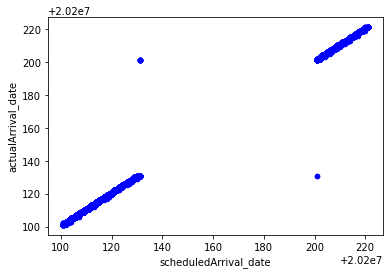

In [25]:
#scatterplot
plot = fin_arr.plot.scatter(x='scheduledArrival_date',
                      y='actualArrival_date',
                      c='Blue',colormap='viridis')

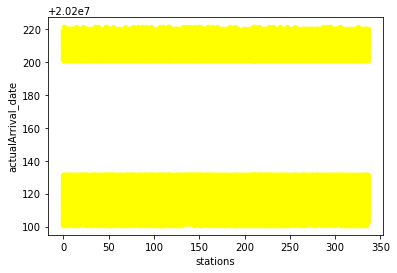

In [26]:
#scatterplot
plot = fin_arr.plot.scatter(x='stations',
                      y='actualArrival_date',
                      c='yellow',colormap='viridis')

In [27]:
X_arr = fin_arr.drop("actualArrival_date",axis=1)
Y_arr = fin_arr["actualArrival_date"]

In [28]:
#FEATURE SCALING METHOD 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X_arr,Y_arr)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_arr.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,runDate,3.132789e+00
1,stations,5.580527e+02
2,trainCode,4.288288e+02
3,trainStationId,2.686656e+06
4,distance,1.878182e+05
5,dayCount,2.911163e+02
6,scheduledArrival_date,3.231874e+00
7,scheduledArrival_time,5.675620e+06
8,scheduledDeparture_date,3.231874e+00
9,scheduledDeparture_time,5.623200e+06


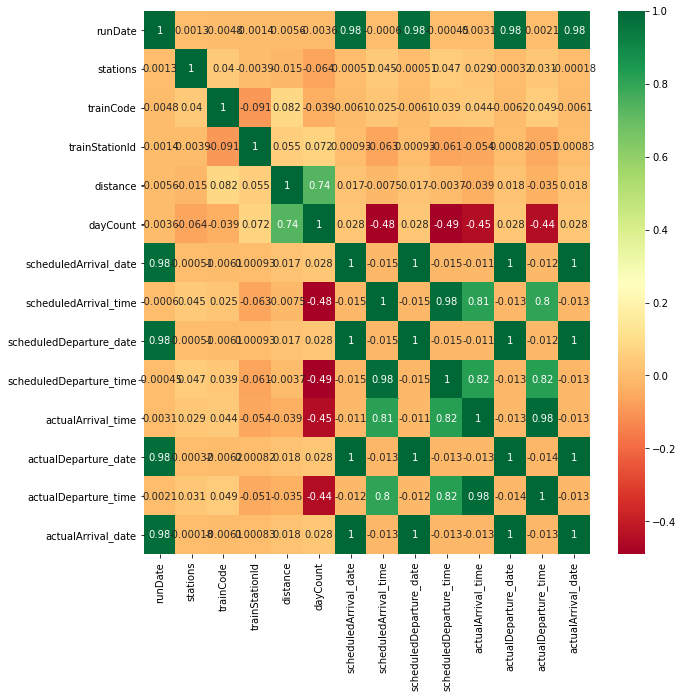

In [29]:
#METHOD 2 FOR FEATURE SELECTION
import seaborn as sns

attr = Y_arr
df_corr = pd.concat([X_arr, Y_arr], axis =1 )

corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
X_fin_arr = X_arr.drop(["stations","trainCode","trainStationId"],axis=1)
X_fin_arr.shape

(30406, 10)

In [31]:
Y_arr.shape

(30406,)

In [32]:
#Splitting the dataset into 70 -30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fin_arr,Y_arr, test_size = 0.3, random_state = 0)

In [33]:
X_train.shape

(21284, 10)

In [34]:
X_test.shape

(9122, 10)

In [35]:
#MULTIPLE LINEAR REGRESSION TRAINING THE MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=int)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=<class 'int'>)

In [36]:
regressor.score(X_train,y_train)

0.9998980560425302

In [37]:
regressor.score(X_test,y_test)

0.9995259968468945

In [38]:
y_pred = regressor.predict(fin_test)
date_predict=pd.DataFrame(data={"TrainCode":fin_test.trainCode,"Actual_Arrival_date":y_pred})
date_predict

,TrainCode,Actual_Arrival_date
1,12138,2.023277e+07
2,12138,2.023277e+07
3,12138,2.023270e+07
4,12138,2.023269e+07
5,12138,2.023277e+07
...,...,...
689,12925,2.023276e+07
690,12925,2.023277e+07
691,12925,2.023277e+07
692,12925,2.023277e+07


In [39]:
date_predict["Actual_Arrival_date"] = date_predict.Actual_Arrival_date.round(decimals=0)
date_predict

,TrainCode,Actual_Arrival_date
1,12138,20232766.0
2,12138,20232767.0
3,12138,20232701.0
4,12138,20232694.0
5,12138,20232767.0
...,...,...
689,12925,20232765.0
690,12925,20232765.0
691,12925,20232766.0
692,12925,20232766.0


In [40]:
#XGBREGRESSOR MODEL 
from xgboost.sklearn import XGBRegressor
regressor_1 = XGBRegressor()
regressor_1.fit(X_train, y_train)

[11:28:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [41]:
regressor_1.score(X_train,y_train)

-132.58859011724024

In [42]:
regressor_1.score(X_test,y_test)

-133.32495873912902

In [43]:
#Descision tree 
from sklearn.tree import DecisionTreeRegressor
regressor_2 = DecisionTreeRegressor(random_state = 0)
regressor_2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
regressor_2.score(X_train,y_train)

0.9985891793268127

In [45]:
regressor_2.score(X_test,y_test)

0.9981373196299054

**PREDICTING ACTUAL TIME**

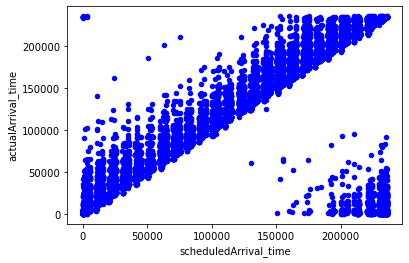

In [46]:
#scatterplot
plot = fin_arr.plot.scatter(x='scheduledArrival_time',
                      y='actualArrival_time',
                      c='Blue',colormap='viridis')

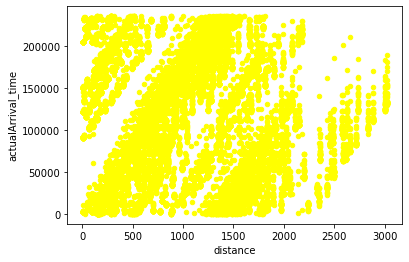

In [47]:
#scatterplot
plot = fin_arr.plot.scatter(x='distance',
                      y='actualArrival_time',
                      c='yellow',colormap='viridis')

In [48]:
X_arr_1 = fin_arr.drop("actualArrival_time",axis=1)
Y_arr_1 = fin_arr["actualArrival_time"]

In [49]:
#FEATURE SCALING METHOD 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X_arr_1,Y_arr_1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_arr_1.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,runDate,1.443406e-01
1,stations,1.710226e+05
2,trainCode,1.643794e+04
3,trainStationId,4.107229e+08
4,distance,1.240174e+06
5,dayCount,3.675258e+03
6,scheduledArrival_date,1.459482e-01
7,scheduledArrival_time,9.872093e+08
8,scheduledDeparture_date,1.459482e-01
9,scheduledDeparture_time,9.928683e+08


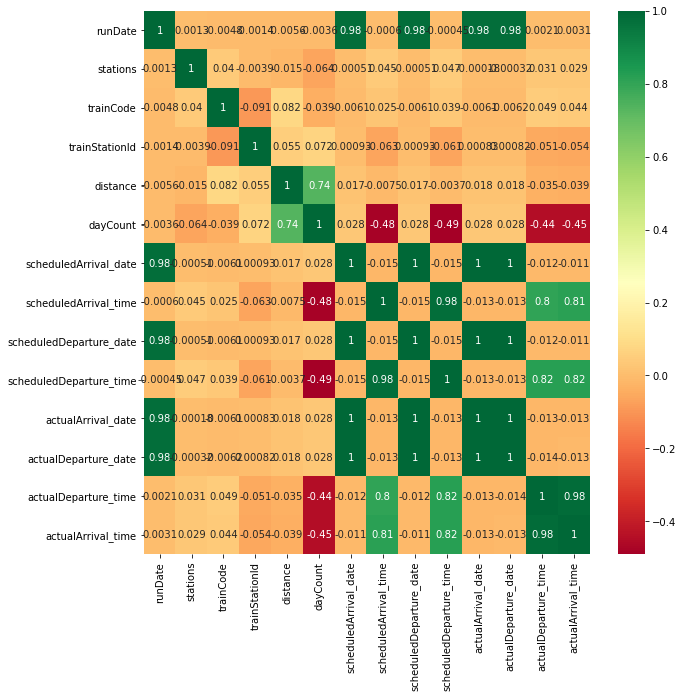

In [50]:
#METHOD 2 FOR FEATURE SELECTION
import seaborn as sns

attr = Y_arr_1
df_corr = pd.concat([X_arr_1, Y_arr_1], axis =1 )

corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
X_fin_arr_2 = X_arr_1.drop(["stations","trainCode","trainStationId"],axis=1)
X_fin_arr_2.shape

(30406, 10)

In [52]:
Y_arr_1.shape

(30406,)

In [53]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_fin_arr_2,Y_arr_1, test_size = 0.3, random_state = 0)

In [54]:
X_train_1.shape

(21284, 10)

In [55]:
X_test_1.shape

(9122, 10)

In [56]:
#MULTIPLE LINEAR REGRESSION TRAINING THE MODEL
from sklearn.linear_model import LinearRegression
regressor_time = LinearRegression(n_jobs=int)
regressor_time.fit(X_train_1, y_train_1)

LinearRegression(n_jobs=<class 'int'>)

In [57]:
regressor_time.score(X_train_1,y_train_1)

0.9720986925448014

In [58]:
regressor_time.score(X_test_1,y_test_1)

0.9731224921478473

In [59]:
y_pred_time = regressor_time.predict(fin_test)
time_predict=pd.DataFrame(data={"TrainCode":fin_test.trainCode,"Actual_Arrival_time":y_pred_time})
time_predict

,TrainCode,Actual_Arrival_time
1,12138,1.159197e+11
2,12138,1.159089e+11
3,12138,1.159053e+11
4,12138,1.158964e+11
5,12138,1.158484e+11
...,...,...
689,12925,1.162509e+11
690,12925,1.162076e+11
691,12925,1.161969e+11
692,12925,1.161874e+11


In [60]:
time_predict["Actual_Arrival_time"] = time_predict.Actual_Arrival_time.round(decimals=0)
time_predict

,TrainCode,Actual_Arrival_time
1,12138,1.159197e+11
2,12138,1.159089e+11
3,12138,1.159053e+11
4,12138,1.158964e+11
5,12138,1.158484e+11
...,...,...
689,12925,1.162509e+11
690,12925,1.162076e+11
691,12925,1.161969e+11
692,12925,1.161874e+11


In [61]:
#XGBREGRESSOR MODEL
from xgboost.sklearn import XGBRegressor
regressor_time_1 = XGBRegressor()
regressor_time_1.fit(X_train_1, y_train_1)

[11:28:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [62]:
regressor_time_1.score(X_train_1,y_train_1)

0.9864832373177473

In [63]:
regressor_time_1.score(X_test_1,y_test_1)

0.9845624797973688

In [64]:
#Descision tree 
from sklearn.tree import DecisionTreeRegressor
regressor_time_2 = DecisionTreeRegressor(random_state = 0)
regressor_time_2.fit(X_train_1, y_train_1)

DecisionTreeRegressor(random_state=0)

In [65]:
regressor_time_2.score(X_train_1,y_train_1)

0.9999969966080887

In [66]:
regressor_time_2.score(X_test_1,y_test_1)

0.9790258262318202

**FINAL ACCTUAL ARRIVAL**

In [67]:
Actual_arrival = pd.DataFrame(data={"TrainCode":fin_test.trainCode,"Actual_Arrival_date":y_pred,"Actual_Arrival_time":y_pred_time})
Actual_arrival["Actual_Arrival_date"] = Actual_arrival.Actual_Arrival_date.round(decimals=0)
Actual_arrival["Actual_Arrival_time"] = Actual_arrival.Actual_Arrival_time.round(decimals=0)
Actual_arrival

,TrainCode,Actual_Arrival_date,Actual_Arrival_time
1,12138,20232766.0,1.159197e+11
2,12138,20232767.0,1.159089e+11
3,12138,20232701.0,1.159053e+11
4,12138,20232694.0,1.158964e+11
5,12138,20232767.0,1.158484e+11
...,...,...,...
689,12925,20232765.0,1.162509e+11
690,12925,20232765.0,1.162076e+11
691,12925,20232766.0,1.161969e+11
692,12925,20232766.0,1.161874e+11
